In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('crop_yield.csv')
dataset

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


In [3]:
dataset.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [4]:
df = dataset.sample(n = 5000, random_state = 42)

In [5]:
df.to_csv('crop_yield_subset', index = False)

In [6]:
df = pd.read_csv('crop_yield_subset')
df

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Silt,Cotton,714.854403,23.875872,False,False,Sunny,120,3.840988
1,North,Chalky,Cotton,860.604672,23.070897,False,False,Rainy,78,5.138173
2,North,Sandy,Barley,802.081954,24.020125,True,True,Rainy,140,6.401523
3,West,Chalky,Cotton,203.616909,16.895211,False,True,Sunny,96,2.658805
4,East,Silt,Rice,510.528102,18.402903,False,True,Cloudy,65,2.797703
...,...,...,...,...,...,...,...,...,...,...
4995,South,Clay,Rice,514.521909,29.649512,True,True,Rainy,108,5.059476
4996,North,Chalky,Soybean,402.570036,25.989185,True,False,Rainy,93,4.342143
4997,North,Chalky,Wheat,243.160421,33.379347,False,True,Rainy,116,2.594023
4998,West,Chalky,Wheat,854.889493,34.400906,False,False,Cloudy,111,5.442554


In [7]:
mean_yield = df['Yield_tons_per_hectare'].mean()
std_yield = df['Yield_tons_per_hectare'].std()
print(f'Mean Yield {mean_yield}')
print(f'Std Yield {std_yield}')
print(f'Low threshold: {mean_yield - std_yield}')
print(f'High threshold: {mean_yield + std_yield}')

def categorize_yield(yield_value):
    if yield_value < mean_yield - std_yield:
        return 'Low'
    elif yield_value > mean_yield + std_yield:
        return 'High'
    else:
        return 'Normal'

df['yield_class'] = df['Yield_tons_per_hectare'].apply(categorize_yield)

Mean Yield 4.696229583178007
Std Yield 1.7041108048529188
Low threshold: 2.9921187783250884
High threshold: 6.4003403880309255


In [8]:
print('Subset Shape:', df.shape)
print('Yield Class Distribution:')
print(df['yield_class'].value_counts())
print("\nYield Ranges per Class:")
print(df.groupby('yield_class')['Yield_tons_per_hectare'].agg(['min', 'max']))

Subset Shape: (5000, 11)
Yield Class Distribution:
yield_class
Normal    3262
Low        874
High       864
Name: count, dtype: int64

Yield Ranges per Class:
                  min       max
yield_class                    
High         6.400552  9.448676
Low          0.036877  2.990403
Normal       2.996069  6.399867


In [9]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,yield_class
0,West,Silt,Cotton,714.854403,23.875872,False,False,Sunny,120,3.840988,Normal
1,North,Chalky,Cotton,860.604672,23.070897,False,False,Rainy,78,5.138173,Normal
2,North,Sandy,Barley,802.081954,24.020125,True,True,Rainy,140,6.401523,High
3,West,Chalky,Cotton,203.616909,16.895211,False,True,Sunny,96,2.658805,Low
4,East,Silt,Rice,510.528102,18.402903,False,True,Cloudy,65,2.797703,Low


In [10]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'yield_class'],
      dtype='object')

In [11]:
# Check crop-specific distributions
print("\nCrop-Specific Yield Stats:")
print(df.groupby('Crop')['Yield_tons_per_hectare'].agg(['mean', 'std']))


Crop-Specific Yield Stats:
             mean       std
Crop                       
Barley   4.654791  1.656825
Cotton   4.689229  1.666276
Maize    4.608493  1.681188
Rice     4.725220  1.745224
Soybean  4.790167  1.721133
Wheat    4.698990  1.752898


In [12]:
df.to_csv('crop_yield_subset.csv', index=False)
print("Subset saved as 'crop_yield_subset.csv'")

Subset saved as 'crop_yield_subset.csv'


In [13]:
df.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
yield_class                object
dtype: object

In [14]:
print(df[['Region', 'Soil_Type', 'Crop', 'Weather_Condition']].nunique())

Region               4
Soil_Type            6
Crop                 6
Weather_Condition    3
dtype: int64


In [15]:
cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
df = pd.get_dummies(df, columns = cols, drop_first = True, dtype = int)
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

In [16]:
df.dtypes

Rainfall_mm                float64
Temperature_Celsius        float64
Fertilizer_Used              int32
Irrigation_Used              int32
Days_to_Harvest              int64
Yield_tons_per_hectare     float64
yield_class                 object
Region_North                 int32
Region_South                 int32
Region_West                  int32
Soil_Type_Clay               int32
Soil_Type_Loam               int32
Soil_Type_Peaty              int32
Soil_Type_Sandy              int32
Soil_Type_Silt               int32
Crop_Cotton                  int32
Crop_Maize                   int32
Crop_Rice                    int32
Crop_Soybean                 int32
Crop_Wheat                   int32
Weather_Condition_Rainy      int32
Weather_Condition_Sunny      int32
dtype: object

In [17]:
df.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,yield_class,Region_North,Region_South,Region_West,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,714.854403,23.875872,0,0,120,3.840988,Normal,0,0,1,...,0,0,1,1,0,0,0,0,0,1
1,860.604672,23.070897,0,0,78,5.138173,Normal,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,802.081954,24.020125,1,1,140,6.401523,High,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,203.616909,16.895211,0,1,96,2.658805,Low,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,510.528102,18.402903,0,1,65,2.797703,Low,0,0,0,...,0,0,1,0,0,1,0,0,0,0


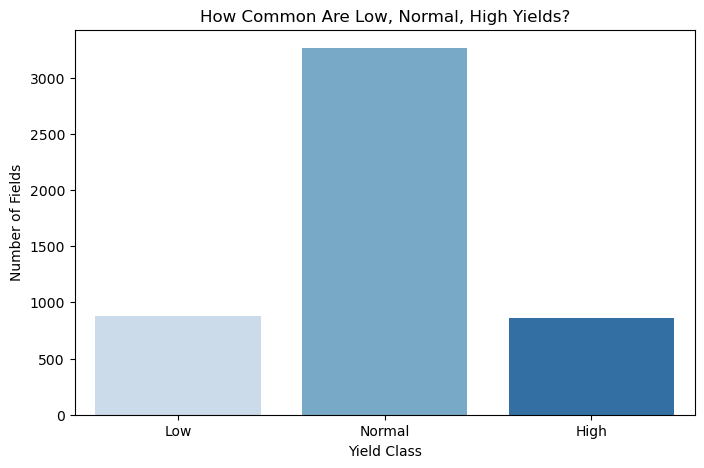

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='yield_class', data=df, order=['Low', 'Normal', 'High'], palette='Blues')
plt.title('How Common Are Low, Normal, High Yields?')
plt.xlabel('Yield Class')
plt.ylabel('Number of Fields')
plt.show()

In [19]:
df['yield_class'] = df['yield_class'].map({'Low':0, 'Normal':1, 'High':2})

In [20]:
x = df.drop(['Yield_tons_per_hectare', 'yield_class'], axis = 1)
y = df['yield_class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [23]:
x_train.shape

(4000, 20)

In [24]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression,
        'params': {
            'C': [0.1, 1.0],
            'class_weight': [{0:1.5, 1:0.5, 2:1.5}]
        }
    },
    'SVM': {
        'model': SVC,
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1.0],
            'class_weight': [{0:1.5, 1:0.5, 2:1.5}]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier,
        'params': {
            'max_depth': [3, 5],
            'min_samples_split': [2, 5],
            'class_weight': [{0:1.5, 1:0.5, 2:1.5}]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier,
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'class_weight': [{0: 1.5, 1: 0.5, 2: 1.5}]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier,
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform', 'distance']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier,
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth':[3]
        }
    }
}

In [25]:
scores = []
for name, config in models.items():
    print(f'Training {name}...')
    gds = GridSearchCV(config['model'](), config['params'], cv = 5, return_train_score = True)
    gds.fit(x_train, y_train)
    test_accuracy = gds.score(x_test ,y_test)
    scores.append({
        'model': name,
        'best_cv_score': gds.best_score_,
        'best_params': gds.best_params_,
        'test_accuracy': test_accuracy
    })
    print(f'Best CV Score: {gds.best_score_}, Test Accuracy: {test_accuracy}, Best Params: {gds.best_params_}')

Training LogisticRegression...
Best CV Score: 0.86075, Test Accuracy: 0.847, Best Params: {'C': 1.0, 'class_weight': {0: 1.5, 1: 0.5, 2: 1.5}}
Training SVM...
Best CV Score: 0.857, Test Accuracy: 0.846, Best Params: {'C': 1.0, 'class_weight': {0: 1.5, 1: 0.5, 2: 1.5}, 'kernel': 'linear'}
Training DecisionTree...
Best CV Score: 0.85725, Test Accuracy: 0.845, Best Params: {'class_weight': {0: 1.5, 1: 0.5, 2: 1.5}, 'max_depth': 5, 'min_samples_split': 2}
Training RandomForest...
Best CV Score: 0.843, Test Accuracy: 0.823, Best Params: {'class_weight': {0: 1.5, 1: 0.5, 2: 1.5}, 'max_depth': 5, 'n_estimators': 100}
Training KNN...
Best CV Score: 0.7927500000000001, Test Accuracy: 0.78, Best Params: {'n_neighbors': 5, 'weights': 'distance'}
Training GradientBoosting...
Best CV Score: 0.87375, Test Accuracy: 0.87, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [28]:
best_model_info = max(scores, key=lambda x: x['test_accuracy'])

best_model = None
for name, config in models.items():
    if name == best_model_info['model']:
        best_model = GridSearchCV(config['model'](), config['params'], cv=5, return_train_score=True)
        best_model.fit(x_train, y_train)
        break

In [30]:
feature_names = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 
                 'Days_to_Harvest', 'Region_North', 'Region_South', 'Region_West', 
                 'Soil_Type_Clay', 'Soil_Type_Loam', 'Soil_Type_Peaty', 'Soil_Type_Sandy', 
                 'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 
                 'Crop_Wheat', 'Weather_Condition_Rainy', 'Weather_Condition_Sunny']
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

def get_user_input():
    print("\nEnter crop yield details:")
    inputs = {}
    prompts = {
        'Rainfall_mm': "Rainfall in mm (e.g., 800 for heavy rain): ",
        'Temperature_Celsius': "Temperature in °C (e.g., 25 for warm weather): ",
        'Days_to_Harvest': "Days to Harvest (e.g., 120 for typical crop cycle): ",
        'Fertilizer_Used': "Fertilizer Used (0 for No, 1 for Yes, e.g., 1 if applied): ",
        'Irrigation_Used': "Irrigation Used (0 for No, 1 for Yes, e.g., 1 if irrigated): ",
        'Region_North': "Region North (0 or 1, e.g., 1 if in North, 0 otherwise): ",
        'Region_South': "Region South (0 or 1, e.g., 1 if in South, 0 otherwise): ",
        'Region_West': "Region West (0 or 1, e.g., 1 if in West, 0 otherwise): ",
        'Soil_Type_Clay': "Soil Type Clay (0 or 1, e.g., 1 if clay soil, 0 otherwise): ",
        'Soil_Type_Loam': "Soil Type Loam (0 or 1, e.g., 1 if loam soil, 0 otherwise): ",
        'Soil_Type_Peaty': "Soil Type Peaty (0 or 1, e.g., 1 if peaty soil, 0 otherwise): ",
        'Soil_Type_Sandy': "Soil Type Sandy (0 or 1, e.g., 1 if sandy soil, 0 otherwise): ",
        'Soil_Type_Silt': "Soil Type Silt (0 or 1, e.g., 1 if silt soil, 0 otherwise): ",
        'Crop_Cotton': "Crop Cotton (0 or 1, e.g., 1 if growing cotton, 0 otherwise): ",
        'Crop_Maize': "Crop Maize (0 or 1, e.g., 1 if growing maize, 0 otherwise): ",
        'Crop_Rice': "Crop Rice (0 or 1, e.g., 1 if growing rice, 0 otherwise): ",
        'Crop_Soybean': "Crop Soybean (0 or 1, e.g., 1 if growing soybean, 0 otherwise): ",
        'Crop_Wheat': "Crop Wheat (0 or 1, e.g., 1 if growing wheat, 0 otherwise): ",
        'Weather_Condition_Rainy': "Weather Rainy (0 or 1, e.g., 1 if rainy, 0 otherwise): ",
        'Weather_Condition_Sunny': "Weather Sunny (0 or 1, e.g., 1 if sunny, 0 otherwise): "
    }
    for col in feature_names:
        if col in numerical_cols:
            inputs[col] = float(input(prompts[col]))
        else:
            inputs[col] = int(input(prompts[col]))
    input_data = pd.DataFrame([inputs])
    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])
    return input_data

while True:
    try:
        user_input = get_user_input()
        prediction = best_model.best_estimator_.predict(user_input)[0]
        label_map = {0: 'Low', 1: 'Normal', 2: 'High'}
        print(f"\nPredicted Crop Yield: {label_map[prediction]}")
        if prediction == 0:
            print("Suggestion: Try more irrigation or fertilizer.")
        elif prediction == 1:
            print("Suggestion: Keep up your current practices!")
        else:
            print("Suggestion: Optimize fertilizer for sustained high yields.")
        again = input("\nTry another prediction? (yes/no): ").strip().lower()
        if again != 'yes':
            break
    except ValueError as e:
        print(f"Error: Invalid input (e.g., non-numeric value). Please try again. Details: {e}")


Enter crop yield details:


Rainfall in mm (e.g., 800 for heavy rain):  500
Temperature in °C (e.g., 25 for warm weather):  35
Fertilizer Used (0 for No, 1 for Yes, e.g., 1 if applied):  0
Irrigation Used (0 for No, 1 for Yes, e.g., 1 if irrigated):  1
Days to Harvest (e.g., 120 for typical crop cycle):  125
Region North (0 or 1, e.g., 1 if in North, 0 otherwise):  0
Region South (0 or 1, e.g., 1 if in South, 0 otherwise):  0
Region West (0 or 1, e.g., 1 if in West, 0 otherwise):  1
Soil Type Clay (0 or 1, e.g., 1 if clay soil, 0 otherwise):  0
Soil Type Loam (0 or 1, e.g., 1 if loam soil, 0 otherwise):  0
Soil Type Peaty (0 or 1, e.g., 1 if peaty soil, 0 otherwise):  0
Soil Type Sandy (0 or 1, e.g., 1 if sandy soil, 0 otherwise):  1
Soil Type Silt (0 or 1, e.g., 1 if silt soil, 0 otherwise):  0
Crop Cotton (0 or 1, e.g., 1 if growing cotton, 0 otherwise):  0
Crop Maize (0 or 1, e.g., 1 if growing maize, 0 otherwise):  0
Crop Rice (0 or 1, e.g., 1 if growing rice, 0 otherwise):  1
Crop Soybean (0 or 1, e.g., 1 if


Predicted Crop Yield: Normal
Suggestion: Keep up your current practices!



Try another prediction? (yes/no):  no
